# **ĐỖ LÝ ANH KIỆT - 2274802010451**

# LAB04: Một số thuật toán cơ bản của học **máy**

Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


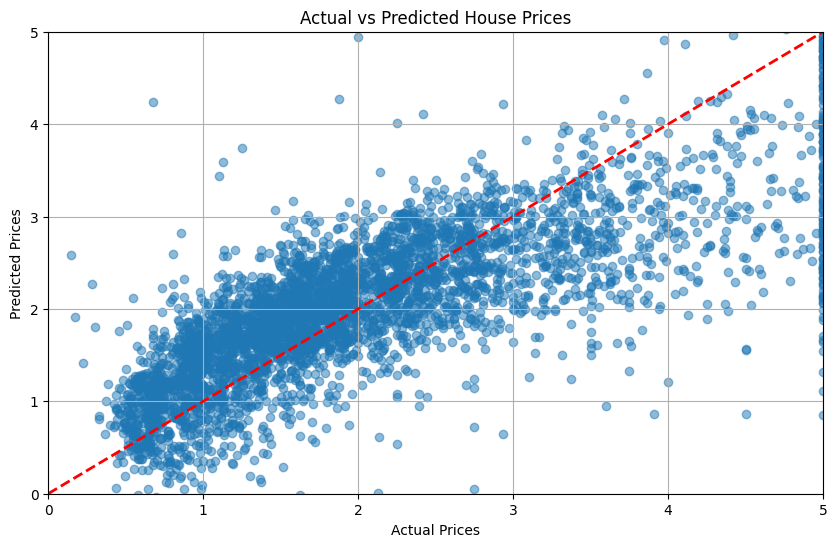

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Sử dụng hồi quy tuyến tính để dự đoán giá nhà thông qua bộ dữ liệu fetch califonia
cali = fetch_california_housing()
x = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.Series(cali.target)

# Chia tập dữ liệu có 80% huấn luyện và 20% kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Xây dựng và huấn luyện mô hình
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(x_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# In thông số đánh giá
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 5], [0, 5], '--r', linewidth=2)  # Kẻ line
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.grid()
plt.show()


Model Performance Metrics:
R² (Train): 0.7514
R² (Test): 0.5003
MSE (Train): 7.3714
MSE (Test): 15.7094
Coefficient: 1.2875
Intercept: -4.7324

Regression Equation: y = 1.2875x + -4.7324


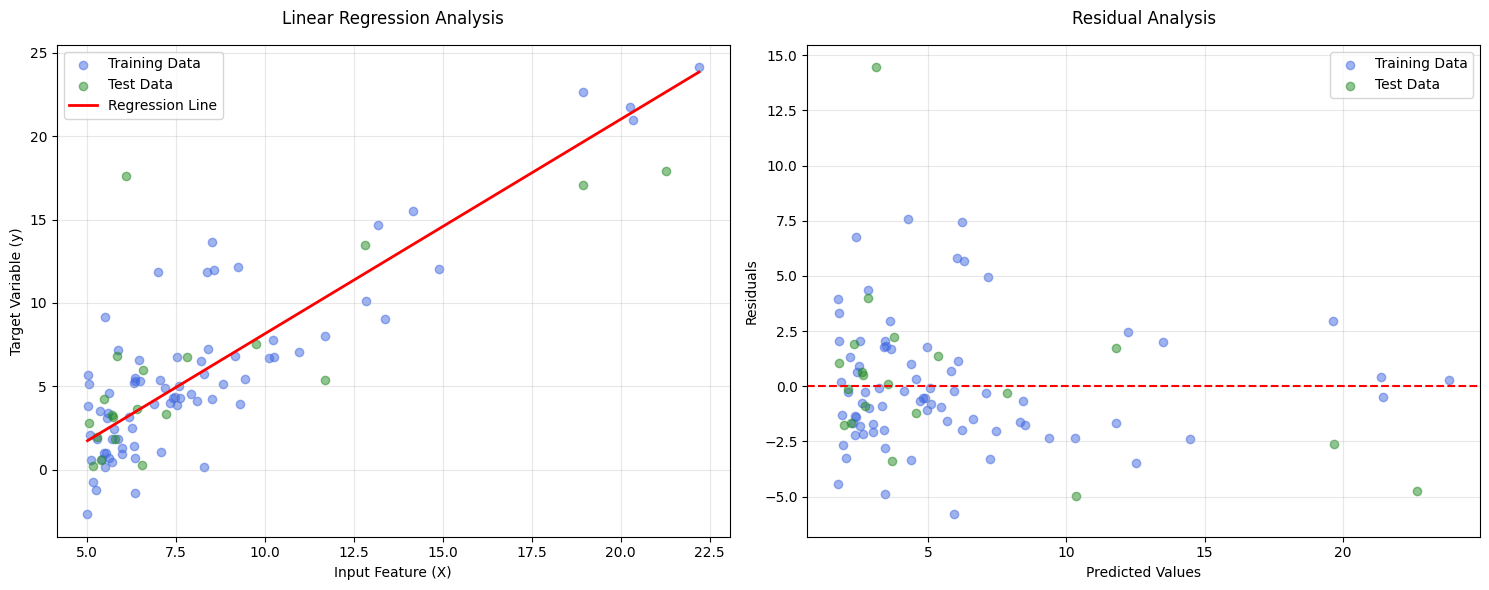

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def load_and_prepare_data(file_path):
    # Load data from text file
    try:
        data = pd.read_csv(file_path, header=None, names=['X', 'y'])
        return data
    except FileNotFoundError:
        print(f"Error: Could not find file at {file_path}")
        print("Please ensure the file exists and the path is correct.")
        return None

def analyze_and_visualize(data, test_size=0.2, random_state=42):
    if data is None:
        return None, None, None

    # Split features and target
    X = data[['X']].values
    y = data['y'].values

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'R² (Train)': r2_score(y_train, y_pred_train),
        'R² (Test)': r2_score(y_test, y_pred_test),
        'MSE (Train)': mean_squared_error(y_train, y_pred_train),
        'MSE (Test)': mean_squared_error(y_test, y_pred_test),
        'Coefficient': model.coef_[0],
        'Intercept': model.intercept_
    }

    # Create visualization
    plt.rcParams['figure.figsize'] = [15, 6]
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # Left plot: Data with regression line
    ax1.scatter(X_train, y_train, c='royalblue', alpha=0.5, label='Training Data')
    ax1.scatter(X_test, y_test, c='forestgreen', alpha=0.5, label='Test Data')

    # Plot regression line
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range = model.predict(X_range)
    ax1.plot(X_range, y_range, 'r-', label='Regression Line', linewidth=2)

    ax1.set_title('Linear Regression Analysis', pad=15)
    ax1.set_xlabel('Input Feature (X)')
    ax1.set_ylabel('Target Variable (y)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Right plot: Residuals
    residuals_train = y_train - y_pred_train
    residuals_test = y_test - y_pred_test

    ax2.scatter(y_pred_train, residuals_train, c='royalblue', alpha=0.5, label='Training Data')
    ax2.scatter(y_pred_test, residuals_test, c='forestgreen', alpha=0.5, label='Test Data')
    ax2.axhline(y=0, color='r', linestyle='--')

    ax2.set_title('Residual Analysis', pad=15)
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Residuals')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()

    return model, metrics, (fig, ax1, ax2)

def main():
    # Try to read the data
    try:
        # First try the provided path
        file_path = '/content/data.txt'
        data = load_and_prepare_data(file_path)

        if data is None:
            # If that fails, try current directory
            file_path = 'data.txt'
            data = load_and_prepare_data(file_path)

        if data is not None:
            model, metrics, plot_elements = analyze_and_visualize(data)

            if metrics:
                # Print metrics
                print("\nModel Performance Metrics:")
                for metric, value in metrics.items():
                    print(f"{metric}: {value:.4f}")

                # Display the equation of the line
                equation = f"y = {metrics['Coefficient']:.4f}x + {metrics['Intercept']:.4f}"
                print(f"\nRegression Equation: {equation}")

                plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please ensure all required libraries are installed:")
        print("pip install pandas numpy matplotlib scikit-learn")

if __name__ == "__main__":
    main()

Accuracy: 0.9650
Confusion Matrix:
 [[51  3]
 [ 2 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



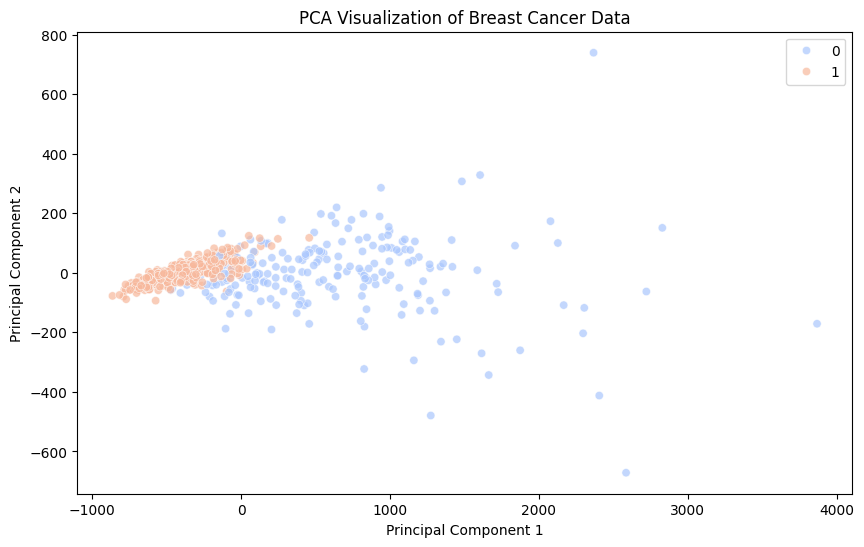

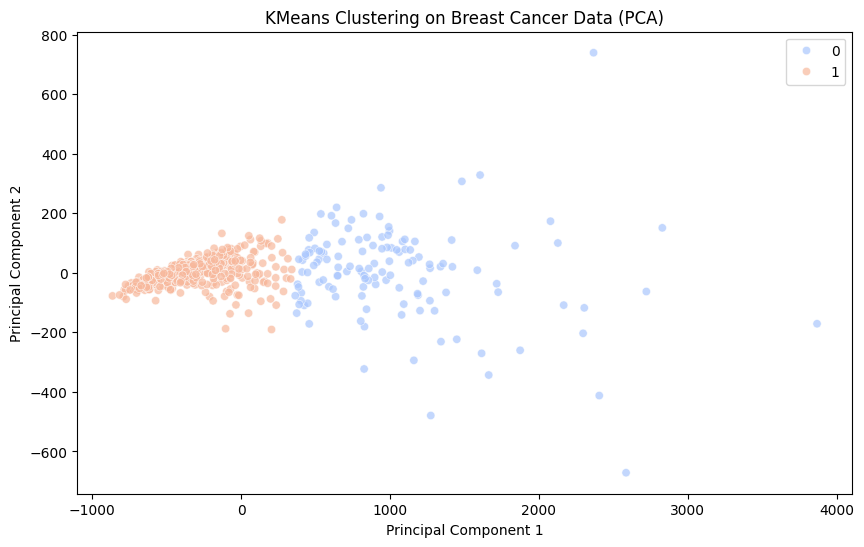

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load dữ liệu
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Chia tập dữ liệu thành tập train (75%) và test (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# 4. Dự đoán mô hình
y_pred = model.predict(X_test)

# 5. Đánh giá mô hình
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# 6. Trực quan hóa dữ liệu bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm", alpha=0.7)
plt.title("PCA Visualization of Breast Cancer Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 7. Phân cụm dữ liệu bằng KMeans (2 cụm)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="coolwarm", alpha=0.7)
plt.title("KMeans Clustering on Breast Cancer Data (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Adjusted Rand Index: 0.7302


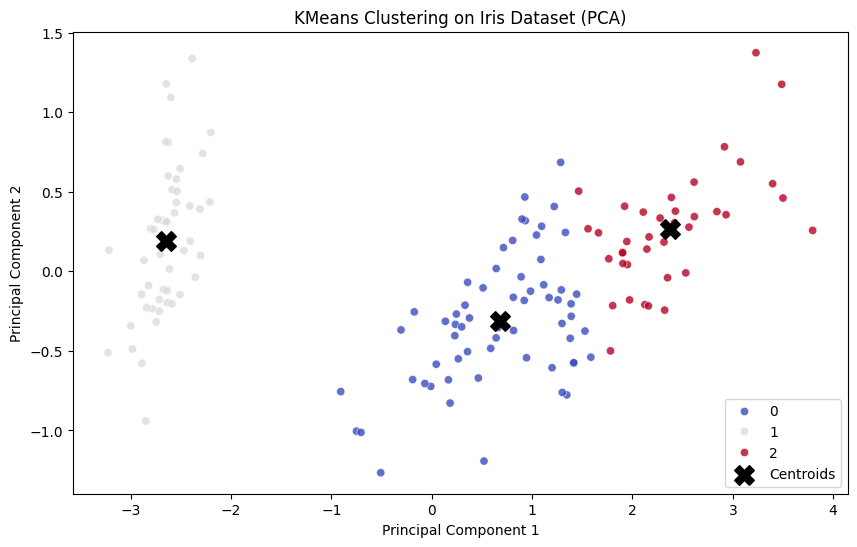

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

# 1. Load dữ liệu Iris
data = load_iris()
X = data.data  # Dữ liệu đặc trưng
y_true = data.target  # Nhãn thực tế để so sánh

# 2. Phân cụm dữ liệu bằng KMeans (3 cụm)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# 3. Đánh giá phân cụm bằng Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(y_true, clusters)
print(f"Adjusted Rand Index: {ari_score:.4f}")

# 4. Giảm số chiều xuống 2D bằng PCA để trực quan hóa
# Biểu đồ 2D dễ quan sát hơn biểu đồ 3D vì mắt người chỉ có thể nhận thức trực tiếp không gian 2 chiều mà không cần xoay hay thay đổi góc nhìn.
# Khi sử dụng PCA, ta giữ lại những thành phần chính có phương sai cao nhất.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 5. Vẽ biểu đồ phân cụm KMeans (Trực quan hóa kết quả)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="coolwarm", alpha=0.8)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
            c='black', marker='X', s=200, label="Centroids") # Thêm tâm cụm
plt.title("KMeans Clustering on Iris Dataset (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()



Missing Values Summary:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.56      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.70      0.53      0.53       732
weighted avg       0.80      0.84      0.78       732



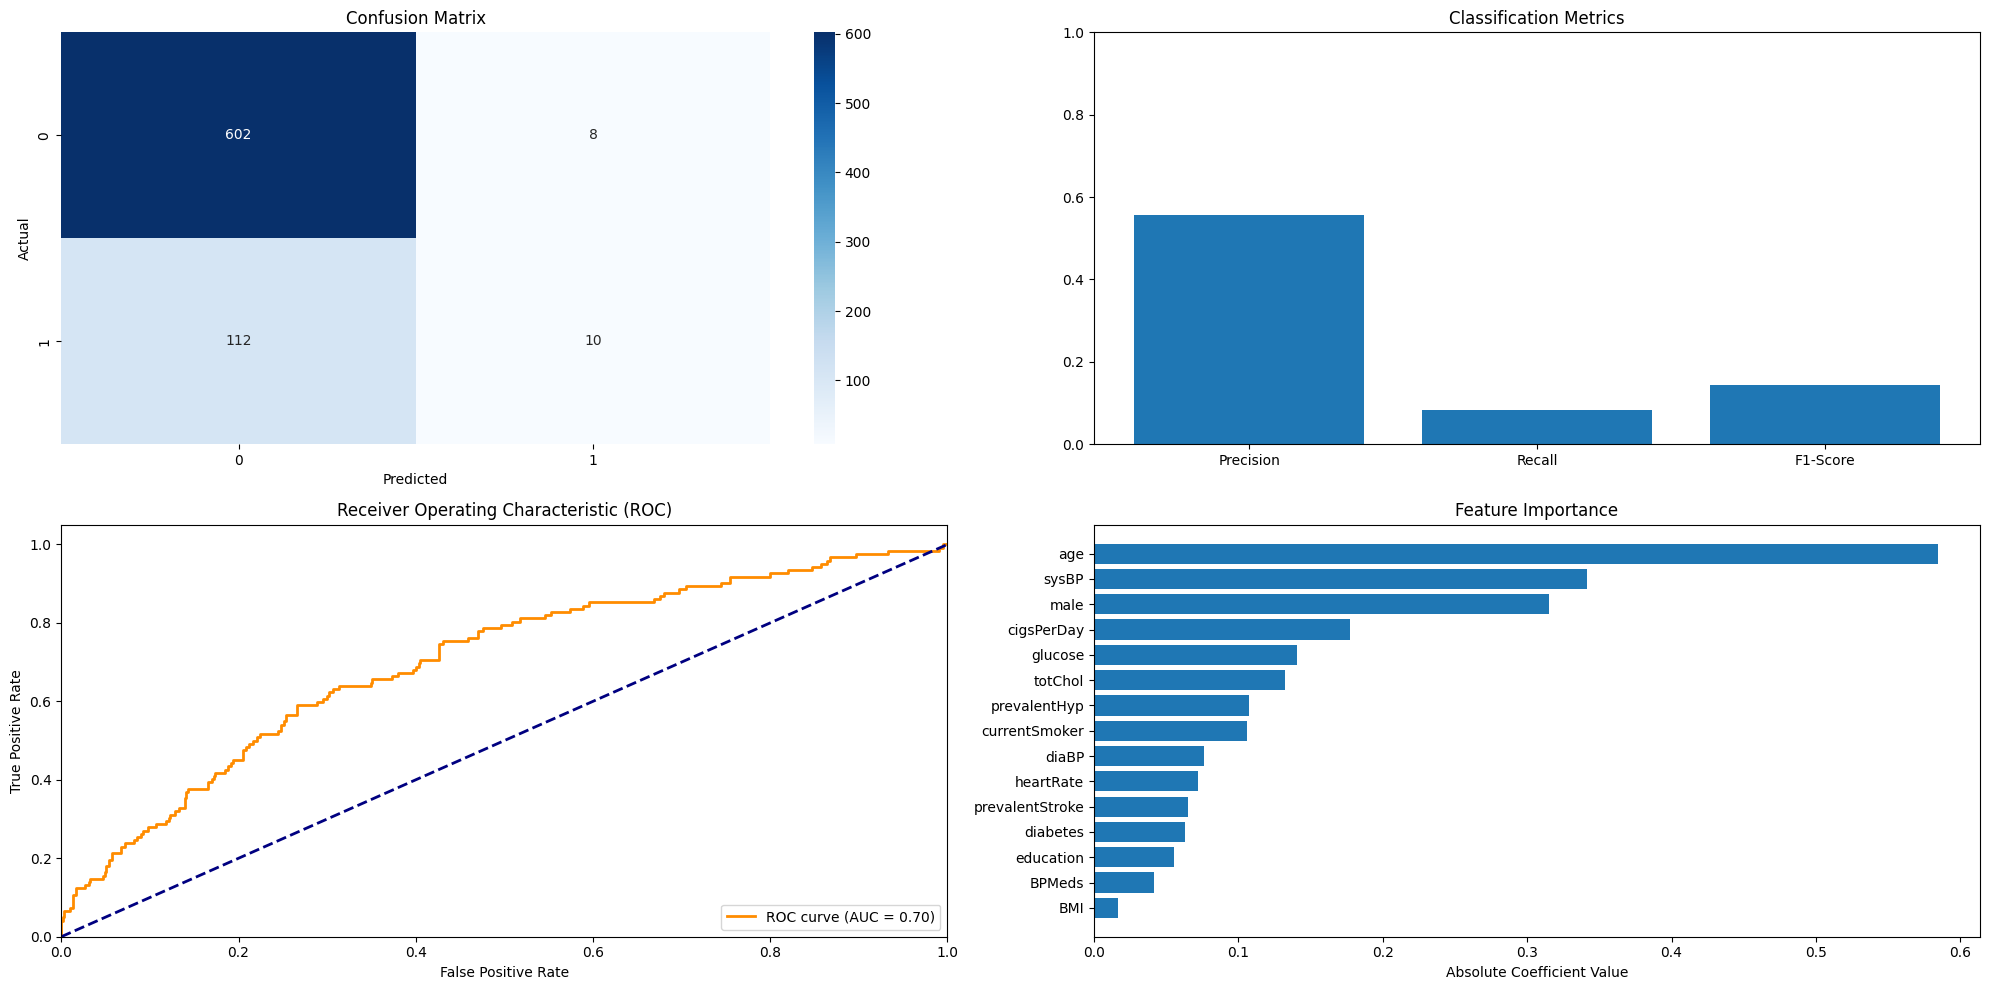


Feature Importance:
            Feature  Importance
1               age    0.584404
10            sysBP    0.341743
0              male    0.315451
4        cigsPerDay    0.177188
14          glucose    0.140442
9           totChol    0.132474
7      prevalentHyp    0.107759
3     currentSmoker    0.105753
11            diaBP    0.076011
13        heartRate    0.072132
6   prevalentStroke    0.065171
8          diabetes    0.063242
2         education    0.055376
5            BPMeds    0.041320
12              BMI    0.016604


In [9]:
# BTVN:
# 1. Cho tập dữ liệu: Dự đoán bệnh tim bằng hồi quy Logictics
# Đã áp dụng ma trận nhầm lẫn và đánh giá độ chính xác trên bài tập 1 (Câu 3)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

def load_and_preprocess_data(filepath):
    # Load the data
    df = pd.read_csv(filepath)

    # Check for missing values
    print("\nMissing Values Summary:")
    print(df.isnull().sum())

    # Handle missing values
    df = df.dropna()  # Remove rows with missing values

    # Separate features and target
    X = df.drop('TenYearCHD', axis=1)  # TenYearCHD is the target variable
    y = df['TenYearCHD']

    return X, y, df

def train_evaluate_model(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train logistic regression
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    return model, X_train_scaled, X_test_scaled, y_train, y_test, y_pred, y_pred_proba

def evaluate_model_performance(y_test, y_pred, y_pred_proba):
    # Calculate metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    return conf_matrix, precision, recall, f1, fpr, tpr, roc_auc

def plot_results(conf_matrix, precision, recall, f1, fpr, tpr, roc_auc, model, X, feature_names):
    plt.figure(figsize=(20, 10))

    # Plot 1: Confusion Matrix
    plt.subplot(2, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Plot 2: Performance Metrics
    plt.subplot(2, 2, 2)
    metrics = [precision, recall, f1]
    plt.bar(['Precision', 'Recall', 'F1-Score'], metrics)
    plt.title('Classification Metrics')
    plt.ylim(0, 1)

    # Plot 3: ROC Curve
    plt.subplot(2, 2, 3)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

    # Plot 4: Feature Importance
    plt.subplot(2, 2, 4)
    importance = abs(model.coef_[0])
    feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feat_importance = feat_importance.sort_values('Importance', ascending=True)
    plt.barh(range(len(importance)), feat_importance['Importance'])
    plt.yticks(range(len(importance)), feat_importance['Feature'])
    plt.title('Feature Importance')
    plt.xlabel('Absolute Coefficient Value')

    plt.tight_layout()
    plt.show()

def main():
    # Load and preprocess data
    X, y, df = load_and_preprocess_data('/content/framinghamlab04.csv')

    # Train and evaluate model
    model, X_train_scaled, X_test_scaled, y_train, y_test, y_pred, y_pred_proba = train_evaluate_model(X, y)

    # Calculate performance metrics
    conf_matrix, precision, recall, f1, fpr, tpr, roc_auc = evaluate_model_performance(y_test, y_pred, y_pred_proba)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot results
    plot_results(conf_matrix, precision, recall, f1, fpr, tpr, roc_auc, model, X, X.columns)

    # Print feature importance
    print("\nFeature Importance:")
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': abs(model.coef_[0])
    })
    print(importance.sort_values('Importance', ascending=False))

if __name__ == "__main__":
    main()

BTVN:

> Câu 2: Ứng dụng thuật toán Kmeans cho tập dữ liệu customer data từ Kaggle (https://www.kaggle.com/datasets/shrutimechlearn/customer-data)


> Không thể áp dụng ma trận nhầm lẫn đối với thuật toán Kmeans vì K-means là một thuật toán học không giám sát






Missing values:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


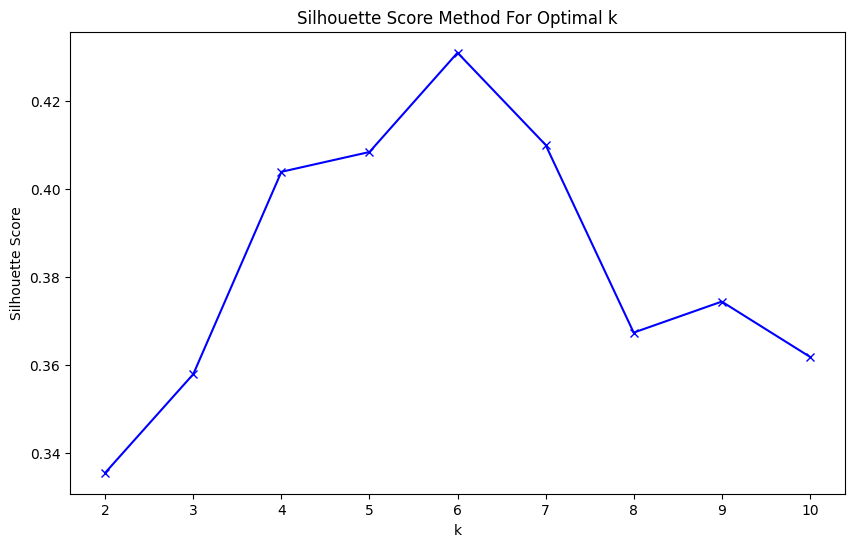

Số cluster tối ưu: 6


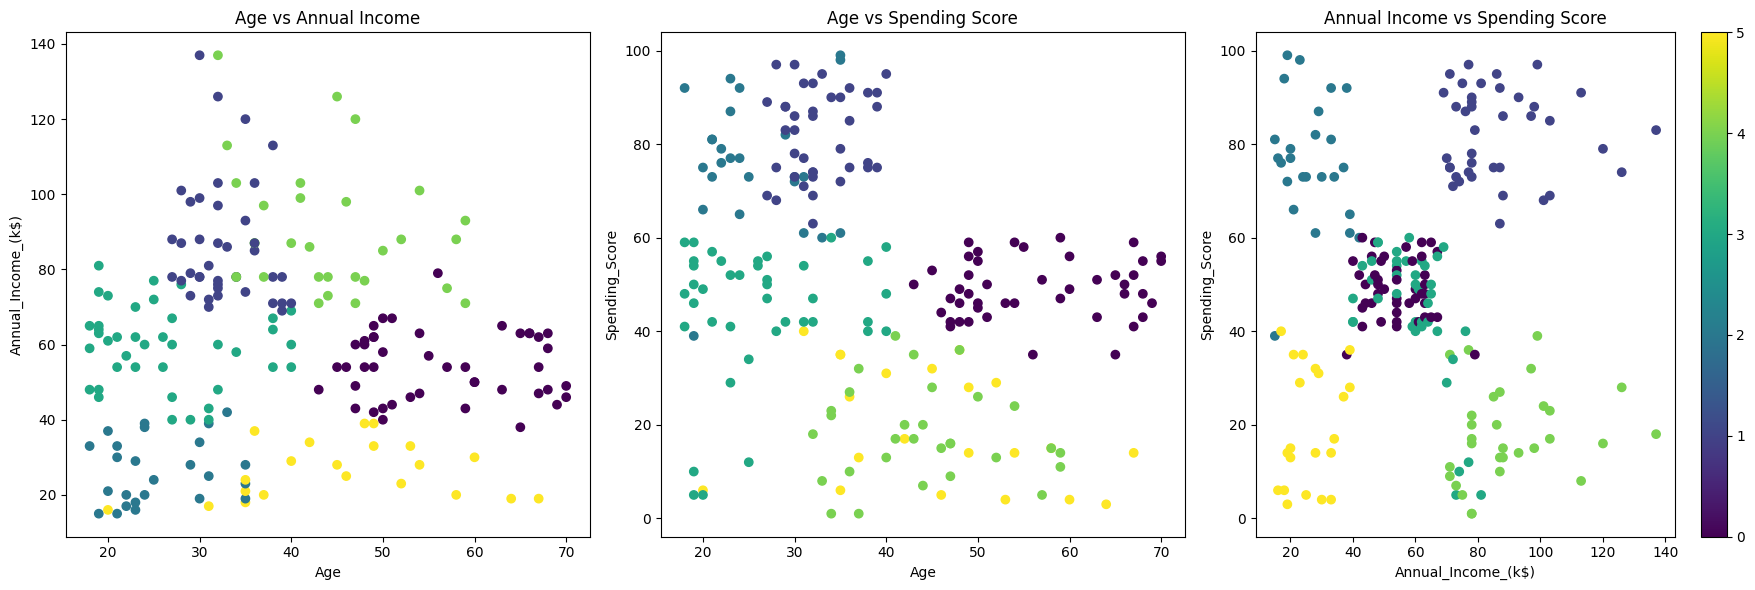

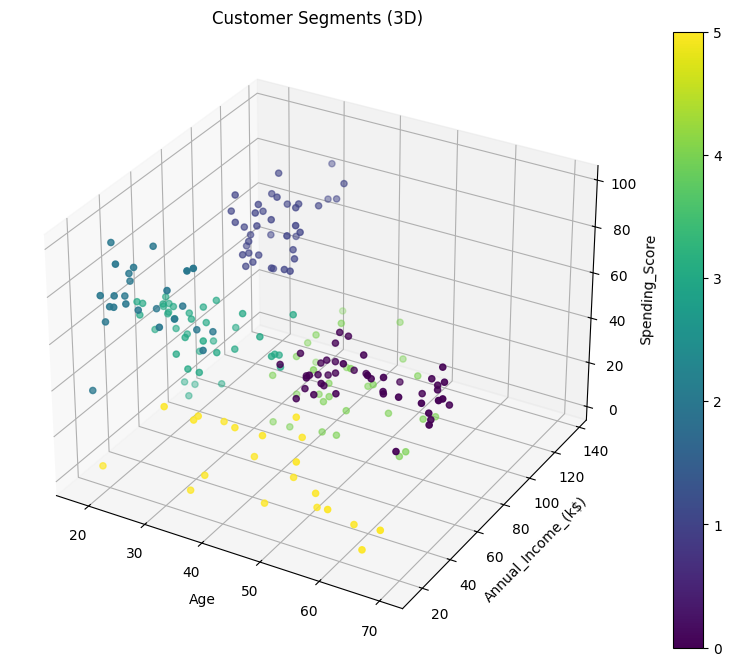


Thống kê các cluster:

Giá trị trung bình của các features trong từng cluster:
               Age  Annual_Income_(k$)  Spending_Score
Cluster                                               
0        56.333333           54.266667       49.066667
1        32.692308           86.538462       82.128205
2        25.560000           26.480000       76.240000
3        26.125000           59.425000       44.450000
4        44.000000           90.133333       17.933333
5        45.523810           26.285714       19.380952

Số lượng khách hàng trong từng cluster:
Cluster
0    45
1    39
2    25
3    40
4    30
5    21
dtype: int64

Phân bố giới tính trong từng cluster:
Genre    Female  Male
Cluster              
0            26    19
1            21    18
2            14    11
3            24    16
4            14    16
5            13     8


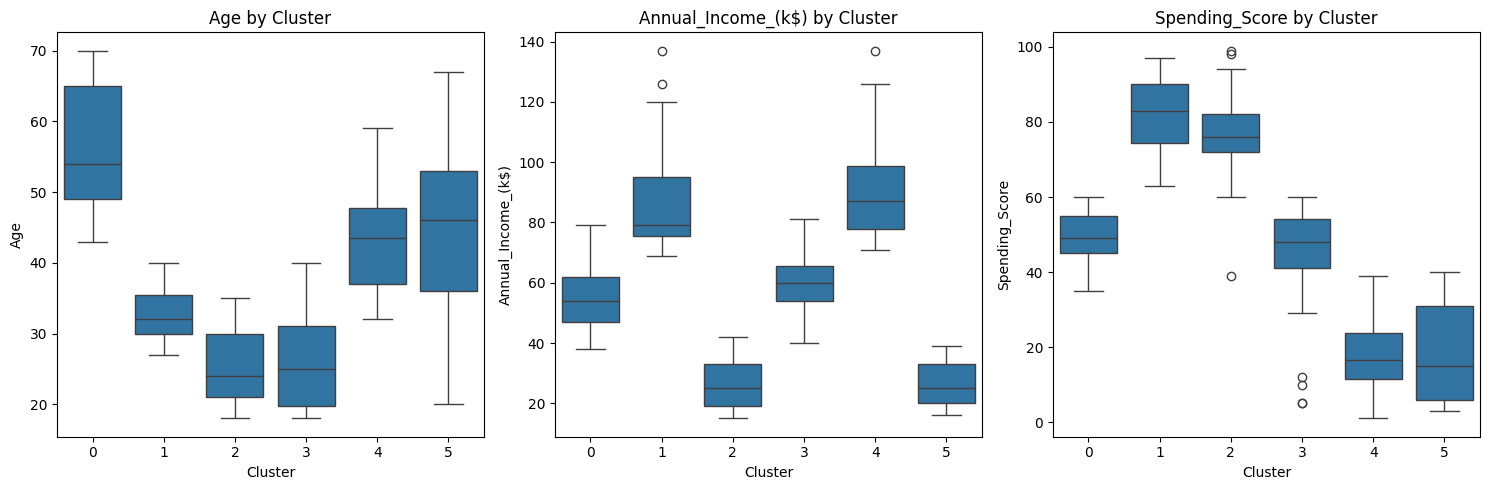

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Đọc dữ liệu
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    # Kiểm tra và xử lý missing values
    print("Missing values:\n", df.isnull().sum())
    df = df.dropna()

    # Chọn các features để clustering
    features = ['Age', 'Annual_Income_(k$)', 'Spending_Score']
    X = df[features]

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return df, X_scaled, features

def find_optimal_clusters(X, max_k=10):
    silhouette_scores = []
    K = range(2, max_k+1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

    # Vẽ biểu đồ silhouette score
    plt.figure(figsize=(10, 6))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method For Optimal k')
    plt.show()

    optimal_k = K[np.argmax(silhouette_scores)]
    print(f'Số cluster tối ưu: {optimal_k}')
    return optimal_k

def perform_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans.labels_

def visualize_clusters_2d(df, labels, features):
    # Tạo nhiều biểu đồ phân tán 2D cho các cặp features khác nhau
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Age vs Income
    axes[0].scatter(df[features[0]], df[features[1]], c=labels, cmap='viridis')
    axes[0].set_xlabel(features[0])
    axes[0].set_ylabel(features[1])
    axes[0].set_title('Age vs Annual Income')

    # Age vs Spending Score
    axes[1].scatter(df[features[0]], df[features[2]], c=labels, cmap='viridis')
    axes[1].set_xlabel(features[0])
    axes[1].set_ylabel(features[2])
    axes[1].set_title('Age vs Spending Score')

    # Income vs Spending Score
    scatter = axes[2].scatter(df[features[1]], df[features[2]], c=labels, cmap='viridis')
    axes[2].set_xlabel(features[1])
    axes[2].set_ylabel(features[2])
    axes[2].set_title('Annual Income vs Spending Score')

    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

def visualize_clusters_3d(df, labels, features):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df[features[0]], df[features[1]],
                        df[features[2]], c=labels, cmap='viridis')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    plt.title('Customer Segments (3D)')
    plt.colorbar(scatter)
    plt.show()

def analyze_clusters(df, labels, features):
    df['Cluster'] = labels

    # Phân tích thống kê cho từng cluster
    print("\nThống kê các cluster:")
    print("\nGiá trị trung bình của các features trong từng cluster:")
    print(df.groupby('Cluster')[features].mean())

    print("\nSố lượng khách hàng trong từng cluster:")
    print(df.groupby('Cluster').size())

    print("\nPhân bố giới tính trong từng cluster:")
    print(pd.crosstab(df['Cluster'], df['Genre']))

    # Vẽ boxplot cho từng feature theo cluster
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(x='Cluster', y=feature, data=df)
        plt.title(f'{feature} by Cluster')
    plt.tight_layout()
    plt.show()

def main():
    # Đọc dữ liệu từ file CSV
    file_path = 'Mall_Customers.csv'

    # Load và chuẩn bị dữ liệu
    df, X_scaled, features = load_and_prepare_data(file_path)

    # Tìm số cluster tối ưu
    optimal_k = find_optimal_clusters(X_scaled)

    # Thực hiện clustering
    labels = perform_clustering(X_scaled, optimal_k)

    # Visualize kết quả
    visualize_clusters_2d(df, labels, features)
    visualize_clusters_3d(df, labels, features)

    # Phân tích các cluster
    analyze_clusters(df, labels, features)

if __name__ == "__main__":
    main()

BTVN:

> Câu 3: Tìm hiểu về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn


---

Ma trận nhầm lẫn là phương pháp đo lường mức độ chính xác và sai sót của mô hình phân loại
Các trường hợp phân loại


*   True Positive (TP): Dự đoán đúng - ảnh mèo thực sự là mèo 🐱✅
*   False Positive (FP): Sai lầm kiểu "quá tự tin" - dự đoán là mèo nhưng thật ra không phải 🐶❌ (Type 1 Error)
*   True Negative (TN): Dự đoán đúng - ảnh không phải mèo và mô hình cũng xác nhận không phải mèo 🐶✅
*   False Negative (FN): Bỏ sót - dự đoán không phải mèo nhưng thực tế lại là mèo 🐱❌ (Type 2 Error)






